[LightGBM] [Info] Number of positive: 200, number of negative: 200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

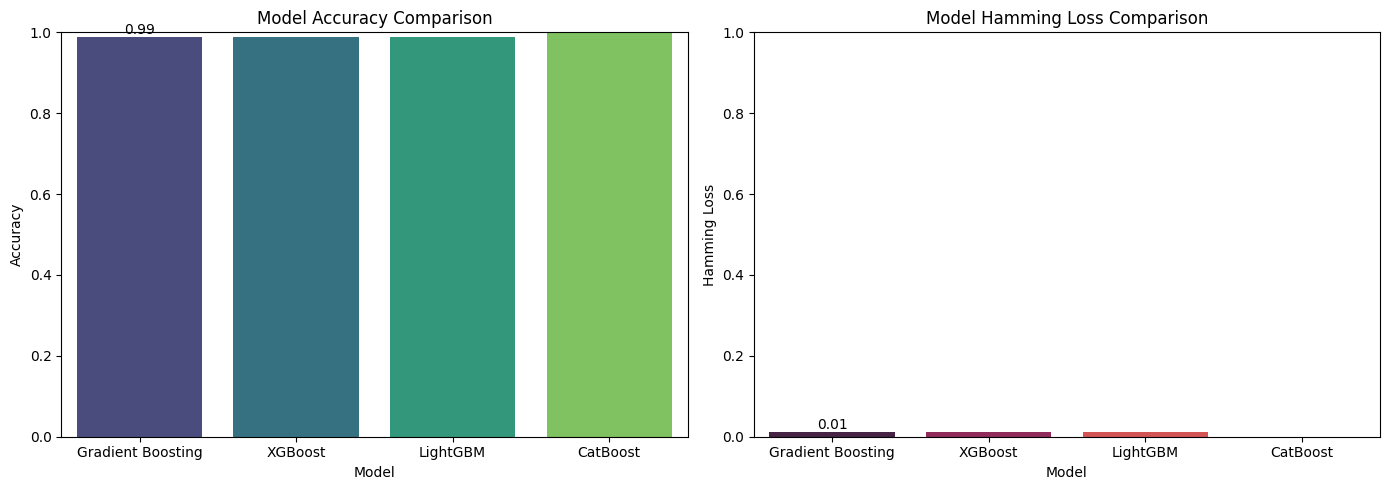

In [3]:
# Install required packages
import sys
!{sys.executable} -m pip install xgboost lightgbm catboost imbalanced-learn seaborn --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, hamming_loss, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("KIDNEY.csv")

# Drop missing values
df = df.dropna()

# ------ CONFIGURE TARGET COLUMN ------
target_column = 'Class'

# Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Encode labels if needed
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance with oversampling
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Results storage
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Mean CV Score": [],
    "Hamming Loss": []
}

# Evaluation function
def evaluate_model(model, name):
    # Fit model
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    hamming = hamming_loss(y_test, y_pred)
    # Compute mean CV score (5-fold CV on resampled data)
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    mean_cv = cv_scores.mean()

    # Store results
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)
    results["Mean CV Score"].append(mean_cv)
    results["Hamming Loss"].append(hamming)

# Train & evaluate each model
evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")
evaluate_model(LGBMClassifier(random_state=42), "LightGBM")
evaluate_model(CatBoostClassifier(verbose=0, random_state=42), "CatBoost")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display table with only values
print("\nModel Performance Metrics:")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean CV Score', 'Hamming Loss']].to_string(index=False))

# Plotting comparison (keeping original plots)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=ax[0], palette='viridis')
ax[0].set_title('Model Accuracy Comparison')
ax[0].bar_label(ax[0].containers[0], fmt='%.2f')
ax[0].set_ylim(0, 1)

sns.barplot(x='Model', y='Hamming Loss', data=results_df, ax=ax[1], palette='rocket')
ax[1].set_title('Model Hamming Loss Comparison')
ax[1].bar_label(ax[1].containers[0], fmt='%.2f')
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 200, number of negative: 200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

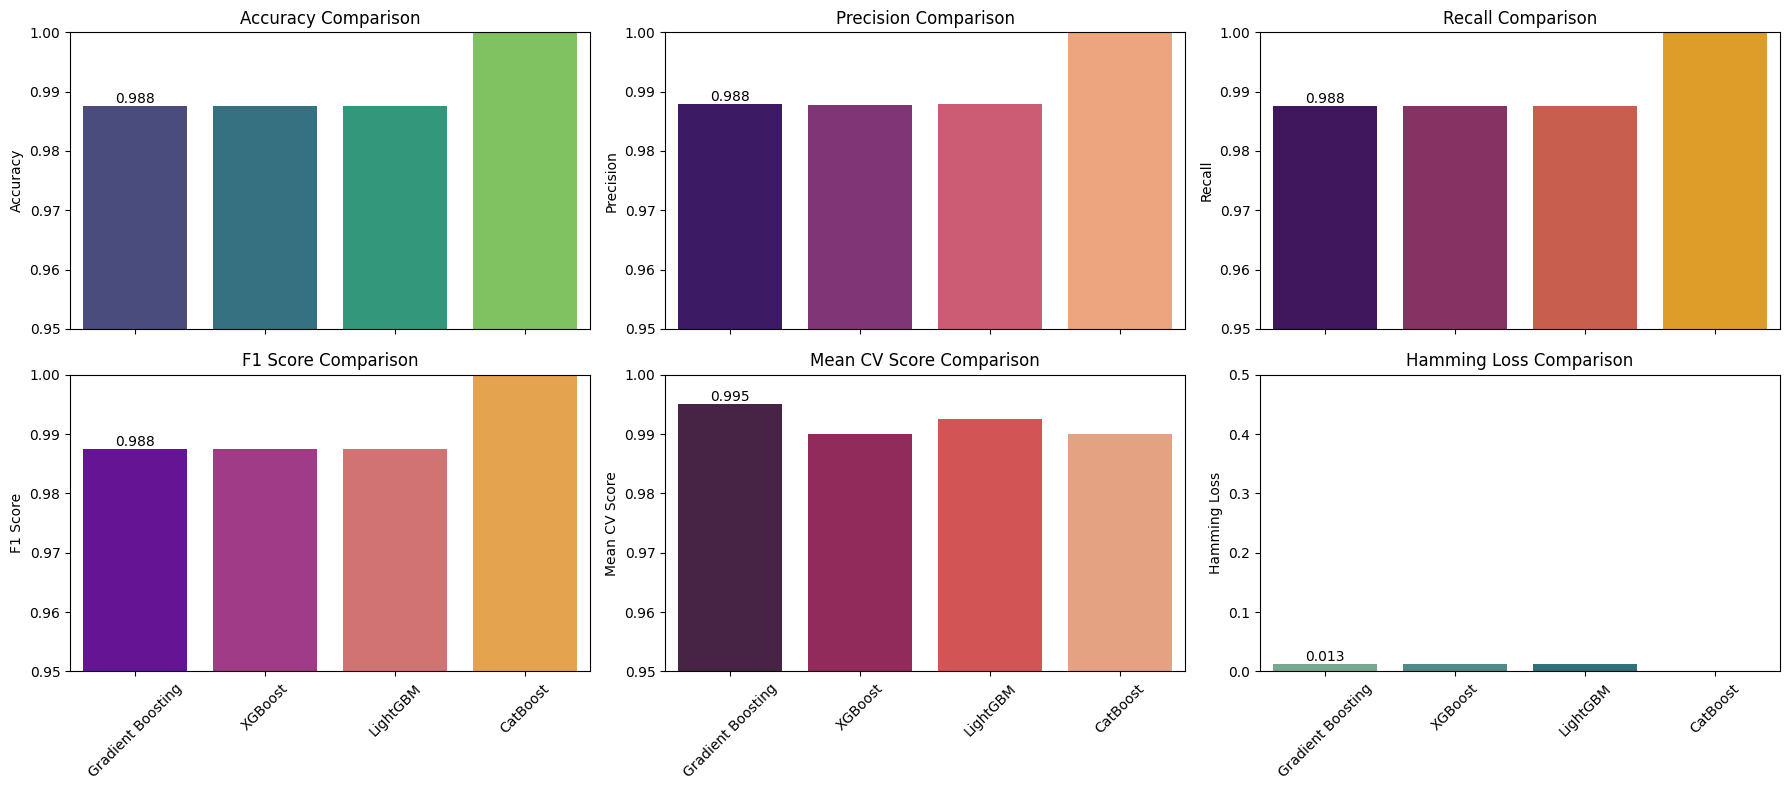

In [6]:
# [Previous imports and code up to model evaluation remain unchanged]
# Ensure all imports from the previous response are included:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

# [Code for loading dataset, preprocessing, train-test split, oversampling, and evaluation function as in previous response]

# Plotting function with updated y-axis range
def plot_metrics(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean CV Score', 'Hamming Loss']
    n_metrics = len(metrics)
    
    # Create a figure with subplots (2 rows, 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True)
    axes = axes.flatten()  # Flatten for easier indexing
    
    # Define color palettes for variety
    palettes = ['viridis', 'magma', 'inferno', 'plasma', 'rocket', 'crest']
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        sns.barplot(x='Model', y=metric, data=results_df, ax=axes[i], palette=palettes[i])
        axes[i].set_title(f'{metric} Comparison')
        # Set y-axis range: 0.95 to 1.0 for all metrics except Hamming Loss
        if metric == 'Hamming Loss':
            axes[i].set_ylim(0, 0.5)  # Hamming Loss range
        else:
            axes[i].set_ylim(0.95, 1.0)  # Specified range for other metrics
        axes[i].bar_label(axes[i].containers[0], fmt='%.3f', fontsize=10)  # Show 3 decimal places
        axes[i].set_xlabel('')  # Remove x-label for clarity
        axes[i].tick_params(axis='x', rotation=45)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# [Code for loading dataset, preprocessing, train-test split, oversampling, and model evaluation remains unchanged]

# Train & evaluate each model
evaluate_model(GradientBoostingClassifier(random_state=42), "Gradient Boosting")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")
evaluate_model(LGBMClassifier(random_state=42), "LightGBM")
evaluate_model(CatBoostClassifier(verbose=0, random_state=42), "CatBoost")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display table with only values
print("\nModel Performance Metrics:")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean CV Score', 'Hamming Loss']].to_string(index=False))

# Plot metrics
plot_metrics(results_df)